# Omics Bioinformatics for Environment and Climate
## Notebook guida generale del corso

Questo notebook funge da **indice ragionato** e guida pratica a tutti gli altri notebook
a supporto delle lezioni.

L'idea è che tu possa:
- vedere la **mappa dei notebook**,
- capire rapidamente **cosa fa ciascuno**,
- lanciare codice minimo di esempio che richiama gli stessi concetti.

I notebook a cui facciamo riferimento sono:

- `01_FASTQ_Phred_QC.ipynb`
- `02_SAM_alignment_basics.ipynb`
- `03_VCF_basics.ipynb`
- `04_Methylation_beta_environment.ipynb`
- `05_DMR_toy_analysis.ipynb`
- `06_Proteomics_LFQ_environment.ipynb`
- `07_Metabolomics_LCMS_environment.ipynb`
- `08_MultiOmics_Integration_ML.ipynb`


## 1. Controllo ambiente e dipendenze

Questo corso si appoggia su un set molto limitato di librerie Python, definite nel tuo `requirements.txt`:

```txt
jupyterlab
ipykernel
numpy
scipy
matplotlib
sympy
pandas
scikit-learn
```

Se tutte queste librerie sono installate nel tuo ambiente, **tutti i notebook del corso funzionano**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import sklearn

print("NumPy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("SciPy:", stats.__version__ if hasattr(stats, "__version__") else "ok")
print("scikit-learn:", sklearn.__version__)

NumPy: 2.3.5
pandas: 2.3.3
matplotlib: 3.10.7
SciPy: ok
scikit-learn: 1.7.2


## 2. Mappa dei notebook per le lezioni

Qui sotto una panoramica che collega **lezioni** ↔ **notebook** ↔ **concetti chiave**.

### Lecture 2 — Genomics: NGS, Formats & QC

**Notebook associati:**

- `01_FASTQ_Phred_QC.ipynb`
  - struttura FASTQ (4 righe per read),
  - Phred score, probabilità di errore,
  - distribuzione qualità, trimming semplice.
- `02_SAM_alignment_basics.ipynb`
  - struttura SAM, campi base (QNAME, FLAG, RNAME, POS, MAPQ, CIGAR),
  - interpretazione del FLAG, % mapped/unmapped, distribuzione MAPQ.
- `03_VCF_basics.ipynb`
  - struttura VCF, REF/ALT/QUAL/FILTER/INFO,
  - distinzione SNP/indel,
  - hard filtering semplice (QUAL, DP).


### Lecture 3 — Epigenomics and Environmental Stressors

**Notebook associati:**

- `04_Methylation_beta_environment.ipynb`
  - beta values (0–1) per CpG,
  - simulazione di esposizione (es. PM₂.₅),
  - confronto controllo vs esposto, correlazioni, DMC semplici.
- `05_DMR_toy_analysis.ipynb`
  - CpG distribuite lungo un tratto genomico,
  - differenze di metilazione per CpG,
  - identificazione "toy" di regioni DMR.


### Lecture 5 — Proteomics (Mass Spectrometry)

**Notebook associato:**

- `06_Proteomics_LFQ_environment.ipynb`
  - intensità LFQ stile MaxQuant (log₂),
  - QC: proteine quantificate per campione, distribuzioni,
  - normalizzazione (mediana per campione),
  - analisi differenziale, volcano plot, proteine candidate.


### Lecture 6 — Metabolomics (LC–MS / NMR)

**Notebook associato:**

- `07_Metabolomics_LCMS_environment.ipynb`
  - tabella feature LC–MS (m/z, RT, intensità),
  - QC: TIC per campione, distribuzioni log10,
  - normalizzazione per TIC,
  - PCA sui campioni,
  - analisi differenziale + volcano plot.


### Lecture 8 — Multi-Omics Integration & Machine Learning

**Notebook associato:**

- `08_MultiOmics_Integration_ML.ipynb`
  - simulazione di RNA + metabolomica + esposizione (LOW vs HIGH),
  - z-score e early integration (concatenazione delle matrici),
  - PCA sui dati integrati,
  - correlazioni gene–metabolita,
  - Random Forest per classificare l'esposizione,
  - feature importance per layer (RNA vs MET).


## 3. Verifica che tutti i notebook siano nella cartella

La cella seguente elenca tutti i file `.ipynb` nella cartella corrente.
Puoi usarla in aula per verificare che gli studenti abbiano scaricato tutto.

In [3]:
import os

notebooks = [f for f in os.listdir('.') if f.endswith('.ipynb')]
for nb_name in sorted(notebooks):
    print(nb_name)

00_Course_Notebooks_Overview.ipynb
01_FASTQ_Phred_QC.ipynb
02_SAM_alignment_basics.ipynb
03_VCF_basics.ipynb
04_Methylation_beta_environment.ipynb
05_DMR_toy_analysis.ipynb
06_Proteomics_LFQ_environment.ipynb
07_Metabolomics_LCMS_environment.ipynb
08_MultiOmics_Integration_ML.ipynb


## 4. Mini-demo multi-omics del corso (tutto in una cella)

Questa cella crea **un esempio super compatto** che riassume lo spirito del corso:

- un set di 3 feature genomiche (es. 3 SNP score sintetici),
- 3 feature epigenomiche (metilazione),
- 3 proteiche,
- 3 metaboliche,
- una variabile di esposizione binaria (LOW/HIGH),
- una PCA e un classificatore Random Forest.

_È solo un assaggio, per collegare mentalmente tutti i livelli omici._

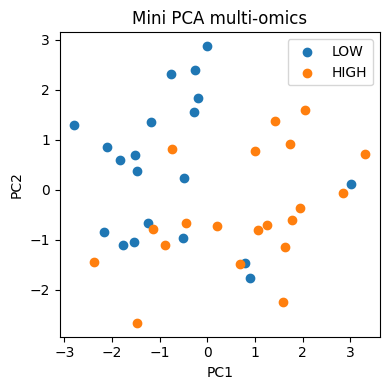

Accuracy RF (mini-demo): 0.667


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)

n_samples = 40
labels = np.array([0]*20 + [1]*20)  # 0=LOW,1=HIGH

# 3 genomics, 3 epigenomics, 3 proteomics, 3 metabolomics
G = np.random.normal(0, 1, size=(n_samples, 3))
E = np.random.normal(0, 1, size=(n_samples, 3))
P = np.random.normal(0, 1, size=(n_samples, 3))
M = np.random.normal(0, 1, size=(n_samples, 3))

# aggiungo un effetto di esposizione su alcune colonne
G[labels == 1, 0] += 1.0
E[labels == 1, 1] += 1.2
P[labels == 1, 2] += 0.8
M[labels == 1, 0] += 1.0

X = np.hstack([G, E, P, M])
feature_names = [
    "G1","G2","G3",
    "E1","E2","E3",
    "P1","P2","P3",
    "M1","M2","M3",
]
df = pd.DataFrame(X, columns=feature_names)

# PCA via SVD
Xc = X - X.mean(axis=0, keepdims=True)
U,S,Vt = np.linalg.svd(Xc, full_matrices=False)
PCs = U[:, :2] * S[:2]

plt.figure(figsize=(4,4))
for lab, lab_name in [(0, 'LOW'), (1, 'HIGH')]:
    idx = (labels == lab)
    plt.scatter(PCs[idx,0], PCs[idx,1], label=lab_name)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Mini PCA multi-omics')
plt.legend()
plt.tight_layout()
plt.show()

# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy RF (mini-demo):', round(accuracy_score(y_test, y_pred), 3))